# Time Series Analysis - Tutorial 1

Import necessary packages for data manipulation and visualization. Pandas is a data analysis and manipulation tool. 

Time Series analysis deals with how time series data behaves over time such as trends, seasonality, variation, cycles and irregulaties.

Data is collected from real life events and is analysze using statistical methods to help make informed predictions of future values

A time series is a set of numerical mesurements of the same type cllected at equaly spaced intervals over time. 

Examples of time series
- average monthly temperature
- annual profit 
- daily gas prices

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Loading the data file. 
Pandas is able to read .csv, .json . html, .hdf, .sql and other file formats.

pd.read_csv can read in a file name or a dataset.

In [53]:
f_birth = pd.read_csv('total_female_births.csv', index_col=[0], parse_dates=[0] ,squeeze=True)

In [54]:
f_birth.head()

,date,births
1,2015-01-01,8068
2,2015-01-02,10850
3,2015-01-03,8328
4,2015-01-04,7065
5,2015-01-05,11892


In [55]:
type(f_birth)

pandas.core.frame.DataFrame

In [56]:
series_value = f_birth.values
# data frame is easier than working with series 
#you can always convert data frame to series 

In [111]:
series_value.size

730

In [57]:
type(series_value) 

numpy.ndarray

In [58]:
f_birth.size

730

In [59]:
f_birth.tail

<bound method NDFrame.tail of            date  births
1    2015-01-01    8068
2    2015-01-02   10850
3    2015-01-03    8328
4    2015-01-04    7065
5    2015-01-05   11892
..          ...     ...
361  2015-12-27    7518
362  2015-12-28   13100
363  2015-12-29   13458
364  2015-12-30   13100
365  2015-12-31   11608

[365 rows x 2 columns]>

In [60]:
f_birth.describe()

,births
count,365.000000
mean,10899.991781
std,2076.683881
min,6515.000000
25%,8431.000000
50%,11883.000000
75%,12339.000000
max,13949.000000


In [61]:
f_birth = f_birth[0:365]

In [62]:
f_birth.describe()

,births
count,365.000000
mean,10899.991781
std,2076.683881
min,6515.000000
25%,8431.000000
50%,11883.000000
75%,12339.000000
max,13949.000000


In [112]:
f_birth.tail

<bound method NDFrame.tail of            date  births
1    2015-01-01    8068
2    2015-01-02   10850
3    2015-01-03    8328
4    2015-01-04    7065
5    2015-01-05   11892
..          ...     ...
361  2015-12-27    7518
362  2015-12-28   13100
363  2015-12-29   13458
364  2015-12-30   13100
365  2015-12-31   11608

[365 rows x 2 columns]>

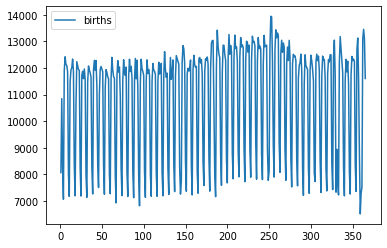

In [63]:
f_birth.plot()

In [64]:
f_birth_mean = f_birth.rolling(window = 20).mean()

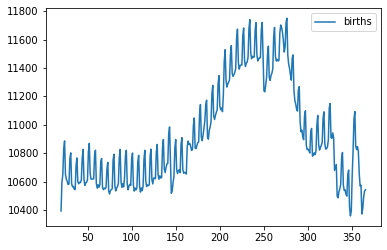

In [65]:
f_birth_mean.plot()

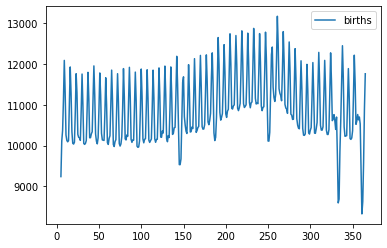

In [115]:
f_birth_mean = f_birth.rolling(window = 5).mean()
f_birth_mean.plot()


In [81]:
value = pd.DataFrame(series_value[:,1]) #need to convert to data frame to let pd.cpncat work

In [82]:
birth_df = pd.concat([value, value.shift(1)], axis = 1)#two series to one dataframe renamned series_vale to value after type change

In [83]:
birth_df.head()

,0,0
0,8068,NaN
1,10850,8068
2,8328,10850
3,7065,8328
4,11892,7065


In [84]:
birth_df.columns = ['Actual_birth', 'Forecast_birth']

In [85]:
#identify error present in this 
# figure error on completet data set or train test - a naive model


In [88]:
from sklearn.metrics import mean_squared_error #To calculate error import mean square error model
import numpy as np

In [90]:
birth_test = birth_df[1:]

In [91]:
birth_test.head()

,Actual_birth,Forecast_birth
1,10850,8068
2,8328,10850
3,7065,8328
4,11892,7065
5,12425,11892


In [98]:
birth_test = birth_test[0:364]

In [99]:
birth_test.head()

,Actual_birth,Forecast_birth
2,8328,10850
3,7065,8328
4,11892,7065
5,12425,11892
6,12141,12425


In [100]:
birth_test.tail()

,Actual_birth,Forecast_birth
360,7518,7294
361,13100,7518
362,13458,13100
363,13100,13458
364,11608,13100


In [101]:
birth_error = mean_squared_error(birth_test.Actual_birth,birth_test.Forecast_birth)

In [107]:
birth_error 

5155304.071625344

In [103]:
np.sqrt(birth_error )

2270.5294694465747

In [105]:
#ARIMA Autoregressive(p) Integrated (d) Moving average(q)